## Final Project Submission

Please fill out:
* Student name:     Jennifer Lavoie
* Student pace:     self paced 
* Scheduled project review date/time: 
* Instructor name:  Jeff Herman 
* Blog post URL:


## Data Import Section

This section of code begins reading in of all provided csv files to explore the available data in order to determine what questions might be able to be answered using this data. 

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## This section is for the import of the csv relating to IMDb data. 

In [2]:
imdb_df1 = pd.read_csv('zippedData/imdb.name.basics.csv.gz')

#dropping the birth year and death year columns as do not intend to use these in analysis
imdb_df1.drop(['birth_year', 'death_year'], axis=1, inplace=True)

imdb_df1.head()


,nconst,primary_name,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


This csv contains "nconst" which appears to be an ID to reference the professionals associated with movie titles.  The titles are given also as an ID. 

In [3]:
print(len(imdb_df1)) #606648

606648


In [4]:
imdb_df2 = pd.read_csv('zippedData/imdb.title.akas.csv.gz')

# dropping these two columns which I do not intend to use in analysis for simplicity and readability 
imdb_df2.drop(['attributes', 'types'], axis=1, inplace=True)

imdb_df2.head()


,title_id,ordering,title,region,language,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,0.0
4,tt0369610,14,Jurassic World,FR,NaN,0.0


This csv links movie titles with their ID, indicates the region of release, language of the movie and whether or not the title is the original title.  It appears that the language column contains a lot of NaNs and might not be very useful in analysis. I won't be using this df any further for the analysis based on the questions I am asking.  

In [5]:
imdb_df3 = pd.read_csv('zippedData/imdb.title.basics.csv.gz')

imdb_df3.head()


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


This csv links the title of the movie to it's ID as well, giving it the name "tconst."  It also links it to a genre and gives information about the title the movie is known by v. original title. It also links the title to its release year and length of the movie. 

In [6]:
print(len(imdb_df3)) #146144

146144


In [7]:
imdb_df4 = pd.read_csv('zippedData/imdb.title.crew.csv.gz')

imdb_df4.head()


,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


This csv links the movie's ID, 'tconst' to the ID given in the first csv I imported from this set, identifying the writers and directors for the movie titles.  

In [8]:
print(len(imdb_df4)) #146144

146144


In [9]:
imdb_df5 = pd.read_csv('zippedData/imdb.title.principals.csv.gz')

# dropping the characters column as I will not be using this in my analysis.  It linked actors to their characters
# in a particular movie ID and is NaN for everyone else.  
imdb_df5.drop('characters', axis=1, inplace=True)

imdb_df5.head()


,tconst,ordering,nconst,category,job
0,tt0111414,1,nm0246005,actor,NaN
1,tt0111414,2,nm0398271,director,NaN
2,tt0111414,3,nm3739909,producer,producer
3,tt0323808,10,nm0059247,editor,NaN
4,tt0323808,1,nm3579312,actress,NaN


This csv links movie titles to various job titles, including actor, director, producer, etc.  It links again with "nconst." Names for "nconst" are linked in the first csv I read in on this project.  

In [10]:
imdb_df6 = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')

imdb_df6.head()


,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


This csv links the average rating of a movie and the number of votes it received by "tconst" movie ID.  

In [11]:
print(len(imdb_df6)) #73856

73856


## This section is the import of the csv for data from TheMovieDB.org

In [12]:
tmdb_df = pd.read_csv('zippedData/tmdb.movies.csv.gz')

# dropping the blank column inserted upon read-in of this csv
tmdb_df.drop('Unnamed: 0', axis=1, inplace=True)

# Converting vote_average to float
tmdb_df['vote_average'] = pd.to_numeric(tmdb_df['vote_average'],errors='coerce')

tmdb_df.head()


,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


This csv gives information on a movie's ranking on this web site and the number of votes, as well as a popularity ranking. It also assigns an ID to the movie, which won't link to the IMDb ID, and it provies genre_ids, but does not provide a way to decode to what genre those ids are linked.  

In [13]:
print(len(tmdb_df)) #26517

26517


In [14]:
# Verifying no NaN values in the vote average column which will be used for analysis in this project
tmdb_df['vote_average'].isna().sum()

0

In [15]:
# Verifying no odd characters or strange data in this column
tmdb_df['vote_average'].unique()

array([ 7.7,  6.8,  7.9,  8.3,  6.1,  7.4,  7.2,  7.5,  6.6,  6. ,  6.7,
        4.5,  7.3,  8.1,  6.3,  4.6,  5.7,  5.9,  8.2,  6.2,  6.4,  7.6,
        6.5,  7.1,  5.6,  5.3,  7. ,  5.8,  4.9,  5.1,  5.5,  6.9,  5.4,
        7.8,  4.7,  4.1,  4.8,  3.2,  8. ,  3.7,  5.2,  2.7,  4.4,  5. ,
        2.9,  2. ,  4. ,  4.2,  3.9,  4.3,  3.5,  3.8,  3.6,  3.4,  3.3,
        3.1,  3. ,  2.5,  2.6, 10. ,  2.2,  1.7,  2.8,  2.3,  1.6,  1.8,
        2.4,  1.5,  8.6,  1.9,  9. ,  8.7,  0.5,  1. ,  8.4,  2.1,  8.8,
        1.3,  9.5,  8.5,  9.8,  0. ,  8.9,  9.3,  9.4,  9.2,  0.8,  1.2,
        1.4,  9.1,  9.7])

## This section is for the import of the csv relating to Box Office Mojo data

In [16]:
bom_df = pd.read_csv('zippedData/bom.movie_gross.csv.gz')

cols = ['domestic_gross', 'foreign_gross']

for col in cols:
    bom_df[col] = pd.to_numeric(bom_df[col], errors='coerce')

bom_df.head()


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010


This csv links a movie title to its domestic and foreign profit, as well as the year released. It provides an abbreviation for studio, but no key available to determine what they mean.  

In [17]:
print(len(bom_df)) # 3387

3387


In [18]:
# Look for NaN values in the columns of interest
for col in cols:
    print(col, '\n', bom_df[col].isna().sum())

# domestic - 28 Nans; foreign - 1355.  

domestic_gross 
 28
foreign_gross 
 1355


In [19]:
# Look for any odd values in the columns of interest
for col in cols:
    print(col, '\n', bom_df[col].value_counts(), '\n\n')
    
# None found

domestic_gross 
 1100000.0      32
1000000.0      30
1300000.0      30
1200000.0      25
1400000.0      23
               ..
68800.0         1
87000000.0      1
739000.0        1
336000000.0     1
727000.0        1
Name: domestic_gross, Length: 1797, dtype: int64 


foreign_gross 
 1200000.0      23
1100000.0      14
4200000.0      12
1900000.0      12
2500000.0      11
               ..
248100000.0     1
494100000.0     1
9500.0          1
92000000.0      1
128000.0        1
Name: foreign_gross, Length: 1199, dtype: int64 




## This section is for the import of data from 'tn'

In [20]:
tn_df = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

# list of columns that will be converted to numeric
cols = ['production_budget', 'domestic_gross', 'worldwide_gross']

# removal of $ and , so that columns can be converted to numeric
tn_df[cols] = tn_df[cols].replace({'\$':'', ',':''}, regex = True)

# conversion of the specified columns to numeric
for col in cols:
    tn_df[col] = pd.to_numeric(tn_df[col], errors='coerce')

tn_df.head()


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


It is unclear which site this csv came from.  It links release date with movie title, production budget, and the domestic and worldwide gross of each movie. 

In [21]:
print(len(tn_df)) # 5782


5782


In [22]:
# Verifying no NaN values in the columns necessary for analysis
for col in cols:
    print(col, '\n', tn_df[col].isna().sum())

# No NaN values present

production_budget 
 0
domestic_gross 
 0
worldwide_gross 
 0


In [23]:
# Look for any odd values in the columns of interest
for col in cols:
    print(col, '\n', tn_df[col].value_counts(), '\n\n')

# There are a number of movies with 0 revenue domestic and some with 0 revenue worldwide.  

production_budget 
 20000000    231
10000000    212
30000000    177
15000000    173
25000000    171
           ... 
16400000      1
103000        1
6537890       1
780000        1
28500000      1
Name: production_budget, Length: 509, dtype: int64 


domestic_gross 
 0           548
8000000       9
2000000       7
7000000       7
10000000      6
           ... 
449865        1
10547117      1
4476235       1
56653         1
40157856      1
Name: domestic_gross, Length: 5164, dtype: int64 


worldwide_gross 
 0            367
8000000        9
7000000        6
2000000        6
4000000        4
            ... 
166000000      1
42843521       1
101173038      1
478595         1
12996          1
Name: worldwide_gross, Length: 5356, dtype: int64 




## This section is for the import of the Rotten Tomatoes data

In [24]:
rt_df1 = pd.read_csv('zippedData/rt.movie_info.tsv.gz', sep='\t')

rt_df1.head()


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


This file provies information on movie titles, including an ID that is assigned to each movie, but no movie title. Will not be able to link this data to the other files.  

In [25]:
print(len(rt_df1)) # 1560

1560


In [26]:
# checking to see how many of the movies are missing box_office values.  
rt_df1['box_office'].isna().sum() #1220

1220

I can analyze ratings v. box office for only 340 movies for this dataset. There is no way to connect this data to other sets as there is no ID in common and no movie titles listed for this data.  Would not be able to match any of this data to the data set that contains film budget.  

In [27]:
rt_df2 = pd.read_csv('Data/rt.reviews.tsv', usecols = ['id','rating', 'fresh', 'critic', 
                   'top_critic', 'publisher', 'date'], sep='\t')
rt_df2.groupby('id') 

rt_df2.head()


,id,rating,fresh,critic,top_critic,publisher,date
0,3,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


This data provides a link to the other Rotten Tomatoes data via movie ID.  I can link those movies to their Rotten Tomatoes rating using this data. Each movie ID has more than one row associated with a review from a different critic.  I did not import the text comment portion of the critic reviews as it created problems with the import and I had no need for that information in this particular analysis. 

In [28]:
rt_df2['rating']= rt_df2['rating'].str.split("/", n = 1, expand = True) 

rt_df2.head()

,id,rating,fresh,critic,top_critic,publisher,date
0,3,3,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


Preparing the data to form a column with the mean of the ratings for each movie given that there are many movies that have NaN values for ratings by particular critics.  The mean rating will be more informative. The ratings are #/5 format, since the ratings are based on a 1-5 scale.  Splitting the data so that only the rating remains. 

In [29]:
# Removing Nan rows
rt_df2 = rt_df2[rt_df2['rating'].notna()]

rt_df2.head()

,id,rating,fresh,critic,top_critic,publisher,date
0,3,3,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
6,3,C,rotten,Eric D. Snider,0,EricDSnider.com,"July 17, 2013"
7,3,2,rotten,Matt Kelemen,0,Las Vegas CityLife,"April 21, 2013"
11,3,B-,fresh,Emanuel Levy,0,EmanuelLevy.Com,"February 3, 2013"
12,3,2,rotten,Christian Toto,0,Big Hollywood,"January 15, 2013"


In [30]:
#Noting that some of the ratings are letters rather than numbers, print a list of unique values found in the ratings

print(rt_df2['rating'].unique())

['3' 'C' '2' 'B-' 'B' '4' '6' '1' '8' '2.5' '2.0' '7' 'A-' '5' 'F' '3.5'
 'D+' '1.5' 'B+' '9' '7.5' '5.5' 'C-' 'C+' '0' '0.5' 'D' '3.1' '4.5' 'D-'
 'A+' 'A' '4.0' '9.5' '2.1' '6.5' '3.7' '8.4' '7.2' '2.2' '7.7' '5.0'
 '8.5' '3.0' '2.3' '8.6' '2.7' '4.2' '5.8' '7.1' 'N' 'R' '5.9' '2.4' '1.9'
 '4.9' '7.4' '8.8' '3.8' '6.8' '7.3' '7.0' '3.2' '6.3' '7.6' '8.1' '3.6'
 '1.8' '8.9' '8.2' '8.3' '2.6' '4.1' 'F+' '6.0' '1.0' '7.9' '8.7' '4.3'
 '9.6' '9.0' '1.7' '6.7' '8.0' '9.2' '5.2' '4.7' '6.2' '3.4' '9.7' '3.3'
 '4.8' '1.6' '1-5' '7.8' 'F-' '4.4' '6.9' 'T' '9.8' '3 1']


In [31]:
# Remove all of the values found in the ratings column that are not numbers. 
letters = ['C', 'B-', 'B', 'A-', 'F', 'D+', 'B+', 'C-', 'C+', 'D', 'D-', 'A', 'A+', 'N', 'R', 'F+',
          'F-', 'T']

rt_df2 = rt_df2[~rt_df2['rating'].isin(letters)]

rt_df2.head()

print(rt_df2['rating'].unique())

['3' '2' '4' '6' '1' '8' '2.5' '2.0' '7' '5' '3.5' '1.5' '9' '7.5' '5.5'
 '0' '0.5' '3.1' '4.5' '4.0' '9.5' '2.1' '6.5' '3.7' '8.4' '7.2' '2.2'
 '7.7' '5.0' '8.5' '3.0' '2.3' '8.6' '2.7' '4.2' '5.8' '7.1' '5.9' '2.4'
 '1.9' '4.9' '7.4' '8.8' '3.8' '6.8' '7.3' '7.0' '3.2' '6.3' '7.6' '8.1'
 '3.6' '1.8' '8.9' '8.2' '8.3' '2.6' '4.1' '6.0' '1.0' '7.9' '8.7' '4.3'
 '9.6' '9.0' '1.7' '6.7' '8.0' '9.2' '5.2' '4.7' '6.2' '3.4' '9.7' '3.3'
 '4.8' '1.6' '1-5' '7.8' '4.4' '6.9' '9.8' '3 1']


In [32]:
# Convert ratings to float from str.  
rt_df2['rating'] = pd.to_numeric(rt_df2['rating'],errors='coerce')

rt_df2.head()

,id,rating,fresh,critic,top_critic,publisher,date
0,3,3.0,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
7,3,2.0,rotten,Matt Kelemen,0,Las Vegas CityLife,"April 21, 2013"
12,3,2.0,rotten,Christian Toto,0,Big Hollywood,"January 15, 2013"
14,3,3.0,fresh,Marty Mapes,0,Movie Habit,"October 20, 2012"
15,3,3.0,fresh,Adam Ross,0,The Aristocrat,"September 27, 2012"


In [33]:
print(len(rt_df2)) #34447

34447


In [34]:
rt_df3 = rt_df2.groupby('id', as_index=False)['rating'].mean()
rt_df3 = rt_df3.rename(columns={'rating': 'mean_rating'})

rt_df3.head()

,id,mean_rating
0,3,3.303191
1,5,3.500000
2,6,2.987179
3,8,4.055556
4,10,2.722222


This dataframe I created gives only the ID of the movie and the mean rating of that movie. It can be combined later with rt_df1 to give a dataframe that contains all the movies in the rt data and their respective ratings.  

In [35]:
print(len(rt_df3)) #1077

1077


## With the data available, I will seek to answer the following 4 questions:

1.  Does the size of the movie budget impact ratings awarded to the movie and do ratings have a relationship to the domestic gross income of a movie? 
2.  Does the size of the movie budget impact the domestic gross income of a movie?
3.  Does choice of director for the movie appear to impact the domestic gross income of a movie? 
4.  Do ratings have a relationship with who directs the movie?  

## Code and Visualizations pertinent to answering Question 1 

Does the size of the movie budget impact ratings awarded to the movie and do ratings have a relationship to the domestic gross income of a movie?

In [36]:
imdb_data = pd.merge(imdb_df3, imdb_df6, how = 'inner', left_on ='tconst', right_on ='tconst')

imdb_data['averagerating'] = pd.to_numeric(imdb_data['averagerating'],errors='coerce')

imdb_data.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [37]:
imdb_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 5.1+ MB


In [38]:
imdb_data.describe()

,start_year,runtime_minutes,averagerating,numvotes
count,73856.000000,66236.000000,73856.000000,7.385600e+04
mean,2014.276132,94.654040,6.332729,3.523662e+03
std,2.614807,208.574111,1.474978,3.029402e+04
min,2010.000000,3.000000,1.000000,5.000000e+00
25%,2012.000000,81.000000,5.500000,1.400000e+01
50%,2014.000000,91.000000,6.500000,4.900000e+01
75%,2016.000000,104.000000,7.400000,2.820000e+02
max,2019.000000,51420.000000,10.000000,1.841066e+06


I created this dataframe that combines the movie titles with their ratings for IMDb data.  This combindation dataframe can be used for both questions 1 and 4.  Inner join provides for only those movies that appear in both tables as I want a dataframe of only movies that have ratings associated with them.  The only column with null values is runtime_minutes which I do not plan to use in this analysis.  

In [39]:
print(len(imdb_data)) # 73856
 

73856


The length of this dataframe is less than df3 and the same as df6 since this will only include movies that have a rating score on IMDb.  This dataframe can be used to answer the question pertaining to budget effect on ratings. 

In [40]:
# Verifying no NaN values in the average rating column
imdb_data['averagerating'].isna().sum() 

0

In [41]:
# Verifying no odd characters or data is in the average rating column 
print(imdb_data['averagerating'].unique())

# None found.

[ 7.   7.2  6.9  6.1  6.5  4.1  8.1  6.8  4.6  7.6  7.5  7.8  4.   8.8
  1.9  6.7  6.6  5.9  7.1  7.4  3.9  5.5  5.1  7.9  6.2  6.3  5.   6.
  5.6  7.3  4.9  6.4  3.3  5.7  8.6  4.8  4.5  4.2  8.7  4.7  5.2  8.3
  9.1  3.4  5.8  5.4  8.5  3.2  3.6  8.   3.8  7.7  4.3  3.   5.3  3.7
  3.5  9.3  8.9  9.   2.3  8.2  2.7  2.8  1.7  4.4  2.2  9.4  8.4  9.2
  9.7  3.1 10.   9.8  2.6  2.5  1.4  2.1  2.4  2.9  1.8  1.6  2.   1.
  1.2  1.5  1.3  1.1  9.5  9.6  9.9]


## This section of code addresses the first part of Question 1:  

Does the size of the movie budget impact ratings awarded to the movie

In [42]:
imdb_tn_merge = pd.merge(imdb_data, tn_df, how = 'inner', left_on ='primary_title', right_on ='movie')

# Dropping some columns that won't pertain to this analysis for readability
imdb_tn_merge.drop(['runtime_minutes', 'release_date', 'movie', 'genres', 'worldwide_gross'], axis=1, inplace=True)

imdb_tn_merge.head()

,tconst,primary_title,original_title,start_year,averagerating,numvotes,id,production_budget,domestic_gross
0,tt0249516,Foodfight!,Foodfight!,2012,1.9,8248,26,45000000,0
1,tt0326592,The Overnight,The Overnight,2010,7.5,24,21,200000,1109808
2,tt3844362,The Overnight,The Overnight,2015,6.1,14828,21,200000,1109808
3,tt0337692,On the Road,On the Road,2012,6.1,37886,17,25000000,720828
4,tt4339118,On the Road,On the Road,2014,6.0,6,17,25000000,720828


In [43]:
imdb_tn_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2875 entries, 0 to 2874
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tconst             2875 non-null   object 
 1   primary_title      2875 non-null   object 
 2   original_title     2875 non-null   object 
 3   start_year         2875 non-null   int64  
 4   averagerating      2875 non-null   float64
 5   numvotes           2875 non-null   int64  
 6   id                 2875 non-null   int64  
 7   production_budget  2875 non-null   int64  
 8   domestic_gross     2875 non-null   int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 224.6+ KB


In [44]:
imdb_tn_merge.describe()

,start_year,averagerating,numvotes,id,production_budget,domestic_gross
count,2875.000000,2875.000000,2.875000e+03,2875.00000,2.875000e+03,2.875000e+03
mean,2013.916522,6.249217,6.628038e+04,50.94087,3.436427e+07,4.302909e+07
std,2.550258,1.185992,1.343077e+05,28.69815,4.774360e+07,7.452513e+07
min,2010.000000,1.600000,5.000000e+00,1.00000,1.400000e+03,0.000000e+00
25%,2012.000000,5.600000,1.410000e+02,27.00000,5.000000e+06,5.017520e+05
50%,2014.000000,6.400000,7.951000e+03,51.00000,1.700000e+07,1.652141e+07
75%,2016.000000,7.100000,7.508100e+04,76.00000,4.000000e+07,5.186291e+07
max,2019.000000,9.300000,1.841066e+06,100.00000,4.250000e+08,7.605076e+08


In [45]:
print(len(imdb_tn_merge)) # 2875

2875


To address the question of budget v. ratings, I created a dataframe that links imdb movie data to data found in the tn_df data, the only dataset that contains movie budget information. This merged dataframe will also contain some info pertaining to domestic revenue for the movies and can be used for answering the second part of this question.  Some movie titles are listed in duplicate, but appears have different release years. 

In [46]:
# code to access the hex codes for my seaborn color pallette
pal = sns.color_palette('BuGn_r')
pal.as_hex()

['#05712f', '#2c9553', '#51b689', '#84cfb9', '#bde6de', '#e2f4f7']

In [47]:
# setting my default seaborn pallette
sns.set_palette('BuGn_r')
sns.set_style('whitegrid')

In [48]:
def histogram_subplots(data1, data2, xlabel1, xlabel2, ylabel1, ylabel2, title1, title2, 
                             bins1 = 'auto', bins2 = 'auto'):
    
    """ 
    Function for generating 2 histogram subplots of the distribution of Ratings and Budget data.
  
    This function will take in the arguments of data1, data2, xlabel1, xlabel2, ylabel1, ylabel2, title1, title2, 
                             bins1 = 'auto', bins2 = 'auto' in order to generate boxplots for data pertaining to 
                             the ratings and budget data.  
  
    Parameters: 
    data1 (df): the name and column of the dataframe that contains the first histogram data; format: df['column'].
    data2 (df): the name and column of the dataframe that contains the second histogram data; format: df['column'].
    xlabel1 (str):  the label to be given to the x-axis of the first subplot
    xlabel2 (str):  the label to be given to the x-axis of the second subplot
    ylabel1 (str):  the label to be given to the y-axis of the first subplot
    ylabel2 (str):  the label to be given to the y-axis of the second subplot
    title1 (str):   the title to be given to the first subplot
    title2 (str):   the title to be given to the second subplot
    bins1 (int):    the number of bins the first histogram will place the data in.  Defaults to 'auto' 
                    integer argument can be added to customize
    bins2 (int):    the number of bins the first histogram will place the data in.  Defaults to 'auto' 
                    int argument can be added to customize
  
    Returns: 
    A subplot containing two formatted histograms showing the distribution of data in the desired columns side by side.  
  
    """
    
    new_figure = plt.figure(figsize=(20,10))

    ax = new_figure.add_subplot(1, 2, 1)
    ax2 = new_figure.add_subplot(1, 2, 2)

    ax.hist(data1, color='#bde6de', bins= bins1)
    ax.set_title(title1)
    ax.set_xlabel(xlabel1)
    ax.set_ylabel(ylabel1)
    ax.axvline(data1.mean(), color='#2c9553');

    ax2.hist(data2, color='#bde6de', bins= bins2)
    ax2.set_title(title2)
    ax2.set_xlabel(xlabel2)
    ax2.set_ylabel(ylabel2)
    ax2.axvline(data2.mean(), color='#2c9553');

    plt.show()

In [49]:
def box_subplts(data, y1, y2, ylabel1, ylabel2, title1, title2):
    
    """ 
    Function for generating 2 boxplot subplots of the distribution of Ratings and Budget data.
  
    This function will take in the arguments of data, y1, y2, ylabel1, ylabel2, title1, and title 2 in order to 
    generate boxplots for data pertaining to the ratings and budget data.  
  
    Parameters: 
    data (df): the name of the dataframe that contains the data
    y1 (str):  the name of the column that contains the data for the first subplot
    y2 (str):  the name of the column that contains the data for the second subplot
    ylabel1 (str):  the label to be given to the y-axis of the first subplot
    ylabel2 (str):  the label to be given to the y-axis of the second subplot
    title1 (str):  the title to be given to the first subplot
    title2 (str):  the title to be given to the second subplot
  
    Returns: 
    A subplot containing two formatted boxplots showing the distribution of data in the desired columns side by side.  
  
    """
    
    f, ax = plt.subplots(1, 2, figsize=(20,10))

    sns.boxplot(y = y1, data = data,  color='#bde6de', 
            ax=ax[0]).set_title(title1)
    ax[0].set(ylabel = ylabel1)

    sns.boxplot(y = y2, data = data,  color='#bde6de', 
            ax=ax[1]).set_title(title2)
    ax[1].set(ylabel = ylabel2)

    plt.show()
    

In [50]:
def simple_regression(x, y, data, title, ylabel, xlabel):
    
    """ 
    Function for generating regression plot of the Ratings and Budget data.
  
    This function will take in the arguments of x, y, data, title, ylabel, xlabel in order to 
    generate a simple linear regression plot for data pertaining to the ratings and budget data.  
  
    Parameters: 
    x (str):       the name of the column containing the independent variable
    y (str):       the name of the column containing the dependent variable 
    data (df):     the name of the dataframe that contains the data
    title (str):   the title to be given to the plot
    ylabel (str):  the label to be given to the y-axis of the plot
    xlabel (str):  the label to be given to the x-axis of the plot
    
  
    Returns: 
    A simple, formatted, linear regression plot for the desired data.
  
    """
    
    sns.regplot(x= x, y= y, scatter_kws={'color':'#bde6de'}, 
            line_kws={'color':'#51b689'}, data= data, fit_reg=True)
    sns.set_context('talk')

    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)

    plt.show()

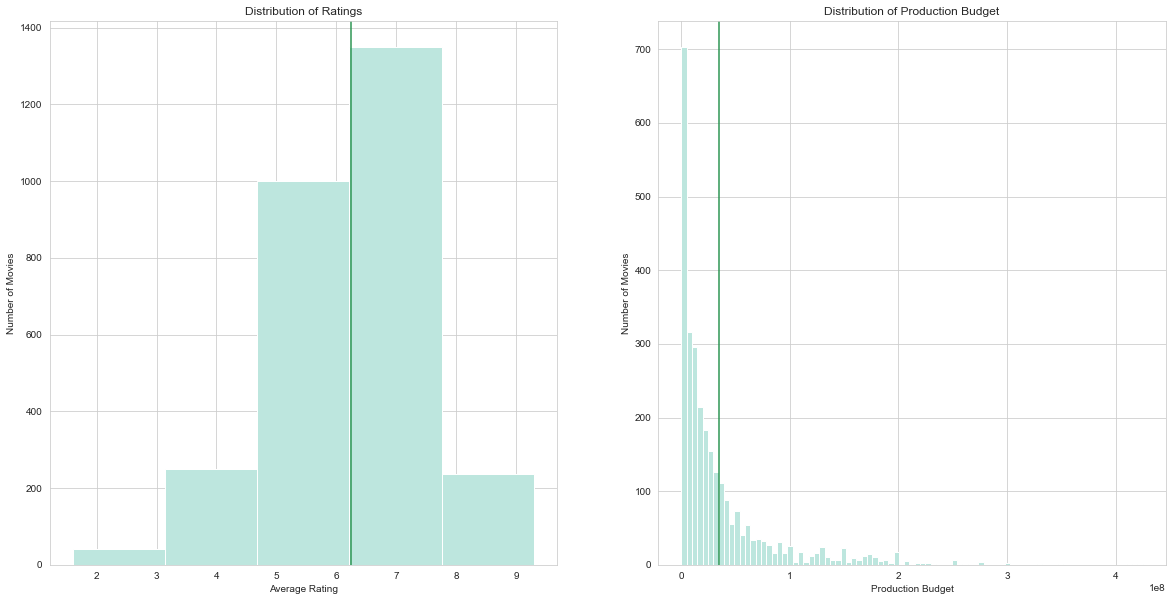

In [51]:
histogram_subplots(imdb_tn_merge['averagerating'], imdb_tn_merge['production_budget'], 'Average Rating', 'Production Budget',
                        'Number of Movies', 'Number of Movies', 'Distribution of Ratings', 'Distribution of Production Budget',
                        5)

Histograms showing the distribution of average ratings and production budget of the movies in this dataframe.  The average ratings seem fairly normally distributed; however, the production budget has some extreme outliers that skew the data.

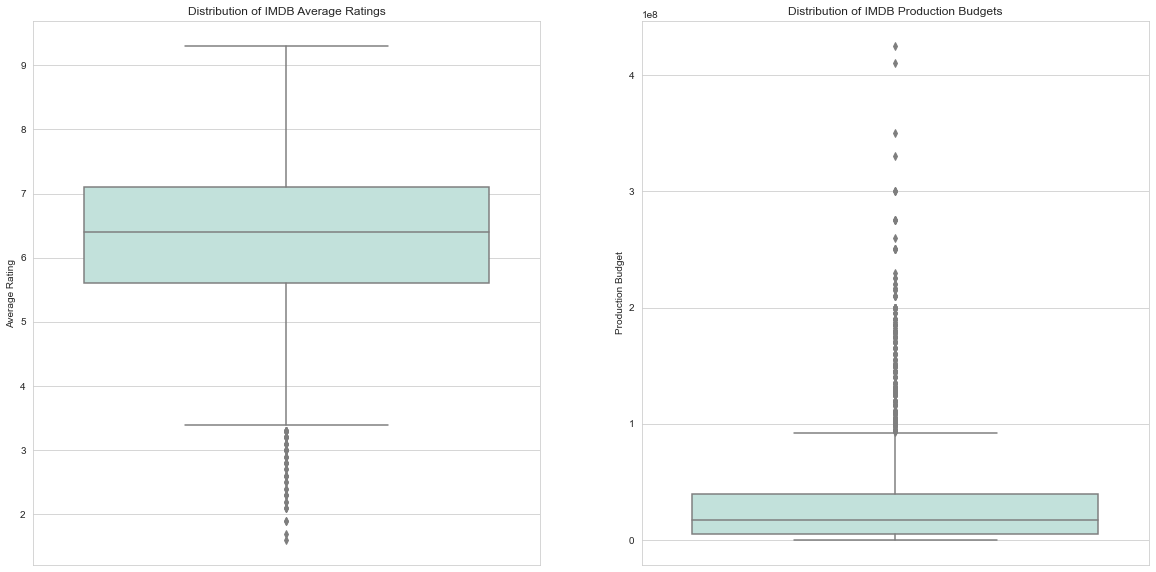

In [52]:
box_subplts(imdb_tn_merge, 'averagerating', 'production_budget', 'Average Rating', 'Production Budget', 
                           'Distribution of IMDB Average Ratings', 'Distribution of IMDB Production Budgets' )

Boxplot of distribution of ratings and production budget. Using this visualization to see the distribution of the budget a bit more clearly.  Most budgets fall under a billion dollars; however a significant number of outliers exist exceeding a billion dollars in budget, including some as extreme as over $4 billion.  

In [53]:
imdb_tn_merge.corr()['averagerating'].sort_values()

id                   0.010373
start_year           0.053334
production_budget    0.130967
domestic_gross       0.177163
numvotes             0.311527
averagerating        1.000000
Name: averagerating, dtype: float64

There does not appear to be a very strong correlation between the budget of the movie and the ratings it received in this dataframe.  

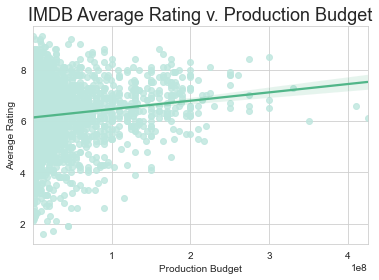

In [54]:
simple_regression('production_budget', 'averagerating', imdb_tn_merge, 
                          'IMDB Average Rating v. Production Budget', 
                          'Average Rating', 'Production Budget')

This simple regression plot shows no real relationship between the IMDb average rating and the production budgets.

The below dataframe combines The Movie DB data with tn data to give only the movies in the move data base data that also have a budget information located in the tn_df.

To determine if removing extreme outliers from the distribution of the production budget information would impact the analysis, I calculated z scores for the data and removed rows that contained data greater than 3 standard deviations from the mean.  

In [55]:
z = np.abs(stats.zscore(imdb_tn_merge['production_budget'])) # calculate z-scores for desired column
print(z)

[0.22280642 0.71570241 0.71570241 ... 0.07616441 0.59419903 0.71936846]


In [56]:
outliers = np.where(z > 3) # create an array showing the rows where the z-score is greater than 3
print(outliers) # an array inside a tuple where each array item indicates a row that has a z-score > 3
print(len(outliers[0])) # 74 rows in the array

outliers = outliers[0].tolist() # want the array in a list instead of having an array inside a tuple.
print(outliers)

(array([   8,   12,   13,   20,   70,  102,  115,  134,  136,  145,  147,
        149,  151,  153,  160,  161,  163,  186,  188,  232,  279,  298,
        329,  341,  346,  463,  464,  521,  524,  530,  586,  601,  604,
        667,  681,  894,  953,  967,  984, 1054, 1279, 1298, 1349, 1427,
       1450, 1457, 1567, 1722, 1836, 1884, 1916, 1949, 1975, 1999, 2057,
       2133, 2190, 2236, 2296, 2344, 2345, 2348, 2381, 2383, 2422, 2457,
       2461, 2469, 2533, 2538, 2620, 2647, 2778, 2816]),)
74
[8, 12, 13, 20, 70, 102, 115, 134, 136, 145, 147, 149, 151, 153, 160, 161, 163, 186, 188, 232, 279, 298, 329, 341, 346, 463, 464, 521, 524, 530, 586, 601, 604, 667, 681, 894, 953, 967, 984, 1054, 1279, 1298, 1349, 1427, 1450, 1457, 1567, 1722, 1836, 1884, 1916, 1949, 1975, 1999, 2057, 2133, 2190, 2236, 2296, 2344, 2345, 2348, 2381, 2383, 2422, 2457, 2461, 2469, 2533, 2538, 2620, 2647, 2778, 2816]


There are 74 rows in the dataset that have a production budget that exceeds 3 standard deviations.  This is a small amount of the total data, so I feel comfortable at least trying the analysis without those data.  

Created a dataframe that has the extreme outliers in the production budget numbers trimmed out. 

In [57]:
imdb_tn_trimmed = imdb_tn_merge.drop(outliers)

imdb_tn_trimmed.head()

,tconst,primary_title,original_title,start_year,averagerating,numvotes,id,production_budget,domestic_gross
0,tt0249516,Foodfight!,Foodfight!,2012,1.9,8248,26,45000000,0
1,tt0326592,The Overnight,The Overnight,2010,7.5,24,21,200000,1109808
2,tt3844362,The Overnight,The Overnight,2015,6.1,14828,21,200000,1109808
3,tt0337692,On the Road,On the Road,2012,6.1,37886,17,25000000,720828
4,tt4339118,On the Road,On the Road,2014,6.0,6,17,25000000,720828


In [58]:
print(len(imdb_tn_trimmed)) #2875

2801


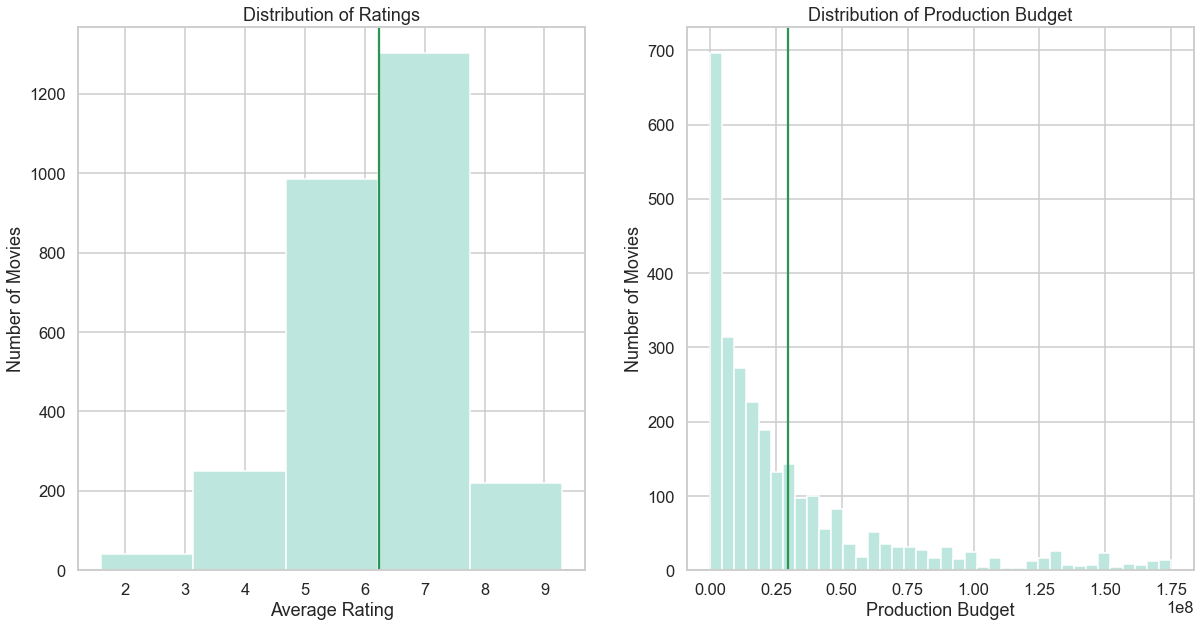

In [59]:
histogram_subplots(imdb_tn_trimmed['averagerating'], imdb_tn_trimmed['production_budget'], 'Average Rating', 'Production Budget',
                        'Number of Movies', 'Number of Movies', 'Distribution of Ratings', 'Distribution of Production Budget',
                        5)

The distribution of the production budget data is still heavily right skewed.  

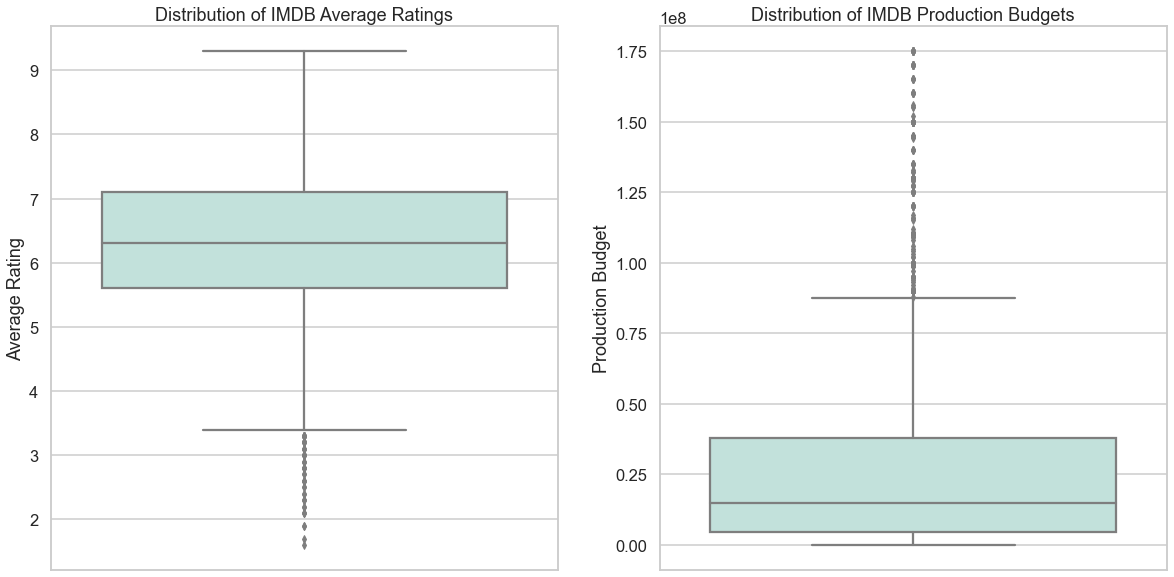

In [60]:
box_subplts(imdb_tn_trimmed, 'averagerating', 'production_budget', 'Average Rating', 'Production Budget', 
                           'Distribution of IMDB Average Ratings', 'Distribution of IMDB Production Budgets' )

There are less extreme values in the Production Budget data distribution now; however, it still has a large spread.  

In [61]:
imdb_tn_trimmed.corr()['averagerating'].sort_values()

id                   0.012778
start_year           0.052519
production_budget    0.099035
domestic_gross       0.152256
numvotes             0.295331
averagerating        1.000000
Name: averagerating, dtype: float64

The correlation between average ratings and production budget is even weaker with the extreme values trimmed.

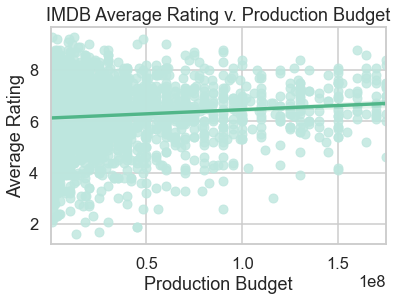

In [62]:
simple_regression('production_budget', 'averagerating', imdb_tn_trimmed, 
                          'IMDB Average Rating v. Production Budget', 
                          'Average Rating', 'Production Budget')

There is no clear relationship between production budget and the rating a movie recieves from viewers.  

In [63]:
# dropping columns that won't be used in this analysis
tmdb_df.drop(['genre_ids', 'id', 'original_language', 'popularity', 'release_date', 'vote_count'], 
             axis=1, inplace=True)

tmdb_df.head()

,original_title,title,vote_average
0,Harry Potter and the Deathly Hallows: Part 1,Harry Potter and the Deathly Hallows: Part 1,7.7
1,How to Train Your Dragon,How to Train Your Dragon,7.7
2,Iron Man 2,Iron Man 2,6.8
3,Toy Story,Toy Story,7.9
4,Inception,Inception,8.3


In [64]:
print(len(tmdb_df)) # 26517

26517


In [65]:
tmdb_tn_merge = pd.merge(tmdb_df, tn_df, how = 'inner', left_on ='original_title', right_on ='movie')

tmdb_tn_merge.head()

,original_title,title,vote_average,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,How to Train Your Dragon,How to Train Your Dragon,7.7,30,"Mar 26, 2010",How to Train Your Dragon,165000000,217581232,494870992
1,Iron Man 2,Iron Man 2,6.8,15,"May 7, 2010",Iron Man 2,170000000,312433331,621156389
2,Toy Story,Toy Story,7.9,37,"Nov 22, 1995",Toy Story,30000000,191796233,364545516
3,Toy Story,Toy Story,7.9,37,"Nov 22, 1995",Toy Story,30000000,191796233,364545516
4,Inception,Inception,8.3,38,"Jul 16, 2010",Inception,160000000,292576195,835524642


In [66]:
tmdb_tn_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2316 entries, 0 to 2315
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   original_title     2316 non-null   object 
 1   title              2316 non-null   object 
 2   vote_average       2316 non-null   float64
 3   id                 2316 non-null   int64  
 4   release_date       2316 non-null   object 
 5   movie              2316 non-null   object 
 6   production_budget  2316 non-null   int64  
 7   domestic_gross     2316 non-null   int64  
 8   worldwide_gross    2316 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 180.9+ KB


In [67]:
tmdb_tn_merge.describe()

,vote_average,id,production_budget,domestic_gross,worldwide_gross
count,2316.000000,2316.000000,2.316000e+03,2.316000e+03,2.316000e+03
mean,6.206261,50.842832,3.790108e+07,4.953869e+07,1.201667e+08
std,1.178079,28.359866,5.150964e+07,8.261483e+07,2.218496e+08
min,0.000000,1.000000,9.000000e+03,0.000000e+00,0.000000e+00
25%,5.600000,27.000000,5.000000e+06,7.788272e+05,3.224914e+06
50%,6.300000,51.000000,1.900000e+07,2.015790e+07,3.722812e+07
75%,6.900000,75.000000,4.650000e+07,5.830223e+07,1.248731e+08
max,10.000000,100.000000,4.250000e+08,7.605076e+08,2.776345e+09


In [68]:
print(len(tmdb_tn_merge)) # 2316

2316


This dataframe combines The Movie DB data with tn data to give only the movies in the move data base data that also have a budget information located in the tn_df.  

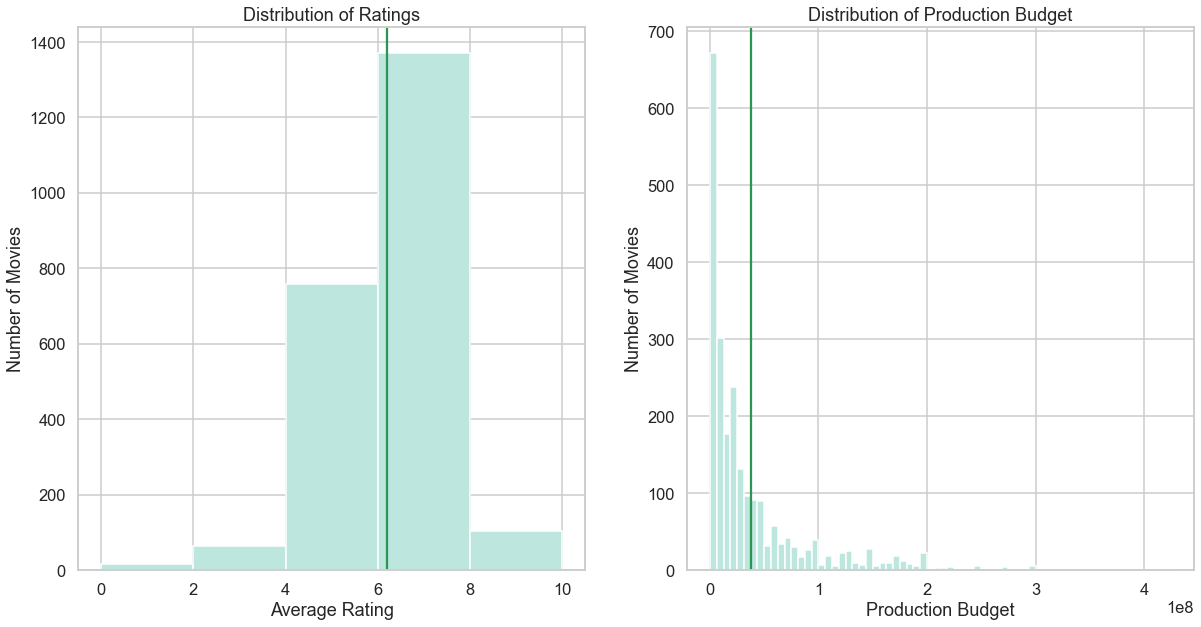

In [69]:
histogram_subplots(tmdb_tn_merge['vote_average'], tmdb_tn_merge['production_budget'], 'Average Rating', 
                         'Production Budget', 'Number of Movies', 'Number of Movies', 'Distribution of Ratings', 
                         'Distribution of Production Budget', 5)

This figure displays a histogram with the distribution of ratings and production budget for the movies found in the TMDB_tn combined dataframe.  The average ratings are close to normal.  The budget values have heavy skew with potentially significant outliers, as was the case in the previous data.  

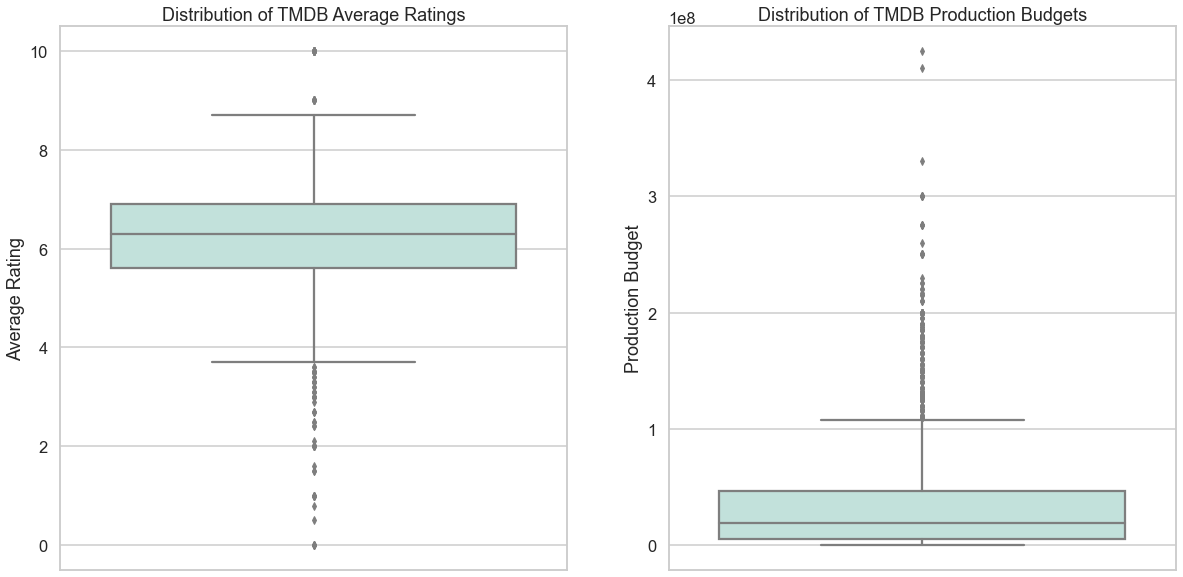

In [70]:
box_subplts(tmdb_tn_merge, 'vote_average', 'production_budget', 'Average Rating', 'Production Budget', 
                           'Distribution of TMDB Average Ratings', 'Distribution of TMDB Production Budgets' )

Boxplots to better visualize the outliers in the distribution of this data.  

In [71]:
tmdb_tn_merge.corr()['vote_average'].sort_values()

id                   0.003180
production_budget    0.132294
worldwide_gross      0.198874
domestic_gross       0.212199
vote_average         1.000000
Name: vote_average, dtype: float64

Production budget does not seem to be well correlated with ratings in this data either.  

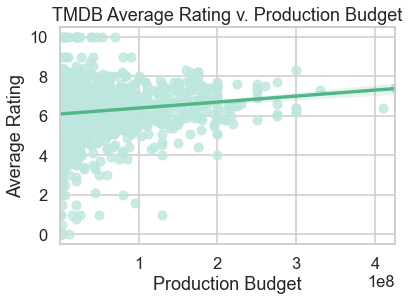

In [72]:
simple_regression('production_budget', 'vote_average', tmdb_tn_merge, 'TMDB Average Rating v. Production Budget', 
                          'Average Rating', 'Production Budget')

Simple linear regression shows little to no correlation between these two features.  

To determine if removing extreme outliers from the distribution of the production budget information would impact the analysis, I used the same technique from the IMDB data and calculated z scores for the data and removed rows that contained data greater than 3 standard deviations from the mean.  

In [73]:
z = np.abs(stats.zscore(tmdb_tn_merge['production_budget'])) # calculate z-scores for desired column
print(z)

[2.46801108e+00 2.56510125e+00 1.53423453e-01 ... 1.92081582e-03
 5.61202159e-01 5.02948058e-01]


In [74]:
outliers = np.where(z > 3) # create an array showing the rows where the z-score is greater than 3
print(outliers) # an array inside a tuple where each array item indicates a row that has a z-score > 3
print(len(outliers[0])) # 74 rows in the array

outliers = outliers[0].tolist() # want the array in a list instead of having an array inside a tuple.
print(outliers)

(array([   6,    7,   12,   14,   17,   38,   40,  310,  313,  323,  543,
        567,  568,  632,  634,  639,  640,  643,  645,  648,  651,  880,
        884,  888,  890,  943,  953,  956, 1114, 1172, 1174, 1200, 1203,
       1461, 1463, 1464, 1478, 1752, 1759, 1770, 1771, 1815, 2006, 2007,
       2009, 2011, 2017, 2040, 2182, 2183, 2190, 2201]),)
52
[6, 7, 12, 14, 17, 38, 40, 310, 313, 323, 543, 567, 568, 632, 634, 639, 640, 643, 645, 648, 651, 880, 884, 888, 890, 943, 953, 956, 1114, 1172, 1174, 1200, 1203, 1461, 1463, 1464, 1478, 1752, 1759, 1770, 1771, 1815, 2006, 2007, 2009, 2011, 2017, 2040, 2182, 2183, 2190, 2201]


There are 52 rows in the dataset that have a production budget that exceeds 3 standard deviations. This is a small amount of the total data, so I feel comfortable at least trying the analysis without those data.

In [75]:
tmdb_tn_trimmed = tmdb_tn_merge.drop(outliers)

tmdb_tn_trimmed.head()

,original_title,title,vote_average,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,How to Train Your Dragon,How to Train Your Dragon,7.7,30,"Mar 26, 2010",How to Train Your Dragon,165000000,217581232,494870992
1,Iron Man 2,Iron Man 2,6.8,15,"May 7, 2010",Iron Man 2,170000000,312433331,621156389
2,Toy Story,Toy Story,7.9,37,"Nov 22, 1995",Toy Story,30000000,191796233,364545516
3,Toy Story,Toy Story,7.9,37,"Nov 22, 1995",Toy Story,30000000,191796233,364545516
4,Inception,Inception,8.3,38,"Jul 16, 2010",Inception,160000000,292576195,835524642


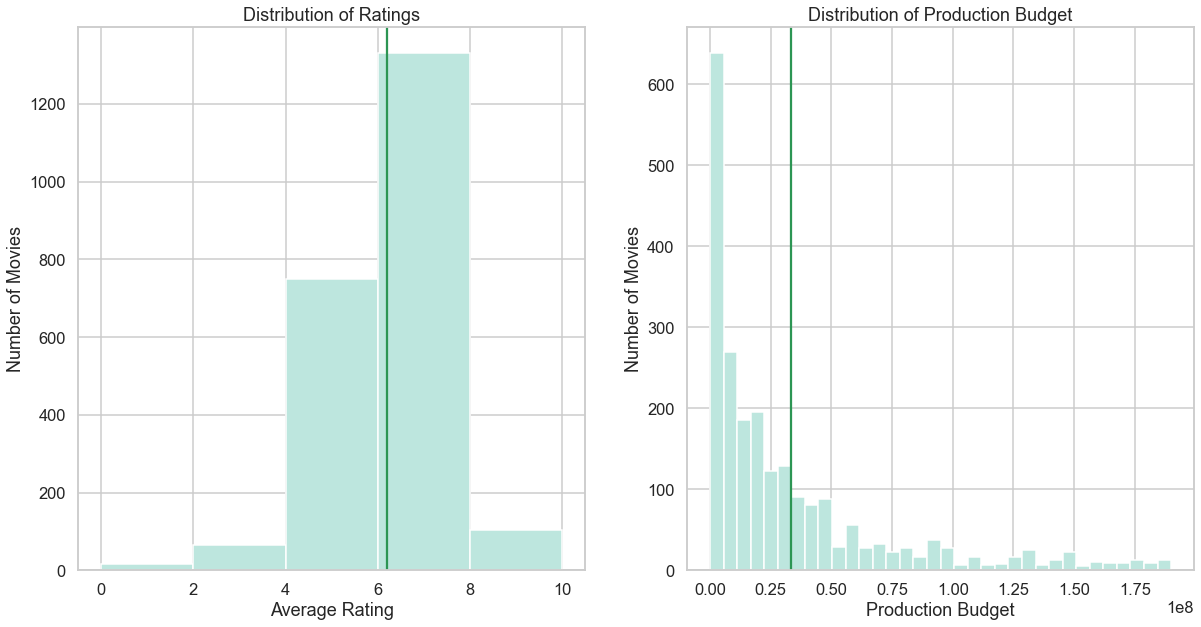

In [76]:
histogram_subplots(tmdb_tn_trimmed['vote_average'], tmdb_tn_trimmed['production_budget'], 'Average Rating', 
                         'Production Budget', 'Number of Movies', 'Number of Movies', 'Distribution of Ratings', 
                         'Distribution of Production Budget', 5)

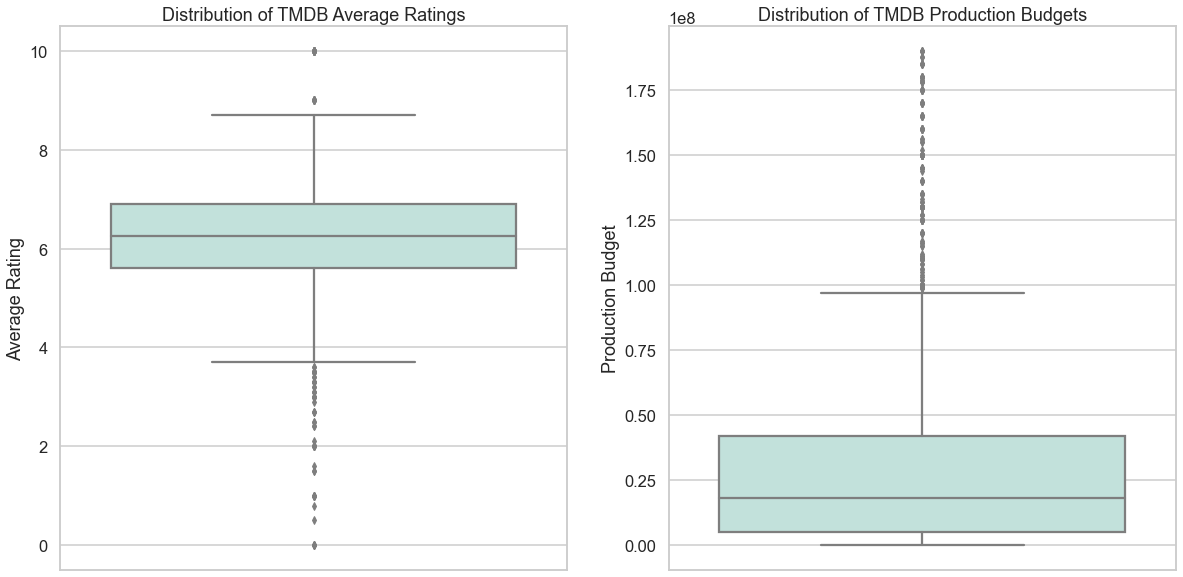

In [77]:
box_subplts(tmdb_tn_trimmed, 'vote_average', 'production_budget', 'Average Rating', 'Production Budget', 
                           'Distribution of TMDB Average Ratings', 'Distribution of TMDB Production Budgets' )

There are less extreme values in the Production Budget data distribution now; however, it still has a large spread.  

In [78]:
tmdb_tn_trimmed.corr()['vote_average'].sort_values()

id                   0.011274
production_budget    0.126556
worldwide_gross      0.199245
domestic_gross       0.210579
vote_average         1.000000
Name: vote_average, dtype: float64

The correlation between ratings and production budget is slightly weaker with the extreme values trimmed.

Simple regression plotting shows the relationship between ratings and production budget is not correlated.

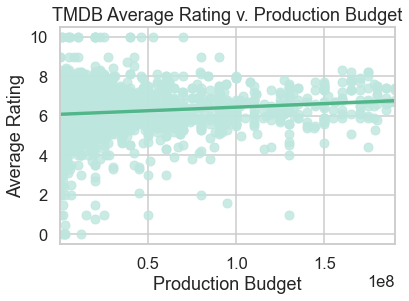

In [79]:
simple_regression('production_budget', 'vote_average', tmdb_tn_trimmed, 'TMDB Average Rating v. Production Budget', 
                          'Average Rating', 'Production Budget')

## This section of code addresses the second part of Question 1:  

Do ratings have a relationship to the domestic gross income of a movie?


In [80]:
imdb_bom_merge = pd.merge(imdb_data, bom_df, how = 'inner', left_on ='primary_title', right_on ='title')

# Dropping some columns that won't pertain to this analysis for readability
imdb_bom_merge.drop(['runtime_minutes', 'year', 'title', 'genres', 'studio', 'foreign_gross'], axis=1, inplace=True)

imdb_bom_merge.head()

,tconst,primary_title,original_title,start_year,averagerating,numvotes,domestic_gross
0,tt0315642,Wazir,Wazir,2016,7.1,15378,1100000.0
1,tt0337692,On the Road,On the Road,2012,6.1,37886,744000.0
2,tt4339118,On the Road,On the Road,2014,6.0,6,744000.0
3,tt5647250,On the Road,On the Road,2016,5.7,127,744000.0
4,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,7.3,275300,58200000.0


Dataframe created that combines imdb data with bom data for additional information on domestic gross revenue for movie titles. Some movie titles are listed in duplicate, but appears have different release years. 

In [81]:
print(len(imdb_bom_merge)) #3027

3027


In [106]:
imdb_revenue_merge = pd.merge(imdb_tn_merge, imdb_bom_merge, how = 'outer', 
                              left_on = ['tconst', 'primary_title', 'domestic_gross', 'averagerating', 
                                         'original_title', 'numvotes', 'start_year'], 
                              right_on =['tconst', 'primary_title', 'domestic_gross', 'averagerating', 
                                         'original_title', 'numvotes', 'start_year'])

imdb_revenue_merge.drop(['id', 'production_budget'], axis=1, inplace=True)

imdb_revenue_merge.drop_duplicates(subset=None, keep='first', inplace=True)

imdb_revenue_merge.head()

,tconst,primary_title,original_title,start_year,averagerating,numvotes,domestic_gross
0,tt0249516,Foodfight!,Foodfight!,2012,1.9,8248,0.0
1,tt0326592,The Overnight,The Overnight,2010,7.5,24,1109808.0
2,tt3844362,The Overnight,The Overnight,2015,6.1,14828,1109808.0
3,tt0337692,On the Road,On the Road,2012,6.1,37886,720828.0
4,tt4339118,On the Road,On the Road,2014,6.0,6,720828.0


This database merges both dataframes that contain revenue info for movies that are also listed on imdb.  Outer join used so that this will include all the movies for which revenue info is available whether that movie is listed in tn, bom, or in both.  

In [107]:
print(len(imdb_revenue_merge)) # 5902

5902


In [108]:
# Look for NaN values in the columns of interest

cols = ['domestic_gross', 'averagerating']

for col in cols:
    print(col, '\n', imdb_revenue_merge[col].isna().sum())


domestic_gross 
 22
averagerating 
 0


In [116]:
imdb_revenue_merge.dropna(subset = ['domestic_gross'], axis = 0, inplace=True)

imdb_revenue_merge['domestic_gross'].isna().sum()

0

Dropping NaN values in the domestic_gross column.  It only affects 22 of the data points out of 5902.  For this question, I am not concerned about production_budget NaN values as this question addresses the relationship between revenue and ratings.  

In [117]:
imdb_revenue_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5880 entries, 0 to 5901
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tconst          5880 non-null   object 
 1   primary_title   5880 non-null   object 
 2   original_title  5880 non-null   object 
 3   start_year      5880 non-null   int64  
 4   averagerating   5880 non-null   float64
 5   numvotes        5880 non-null   int64  
 6   domestic_gross  5880 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 367.5+ KB


In [118]:
imdb_revenue_merge.describe()

,start_year,averagerating,numvotes,domestic_gross
count,5880.000000,5880.000000,5.880000e+03,5.880000e+03
mean,2013.853741,6.356973,6.413217e+04,3.669776e+07
std,2.507353,1.104473,1.300792e+05,7.090728e+07
min,2010.000000,1.600000,5.000000e+00,0.000000e+00
25%,2012.000000,5.800000,6.517500e+02,1.817500e+05
50%,2014.000000,6.500000,1.108900e+04,6.798848e+06
75%,2016.000000,7.100000,6.998600e+04,4.278445e+07
max,2019.000000,9.300000,1.841066e+06,7.605076e+08


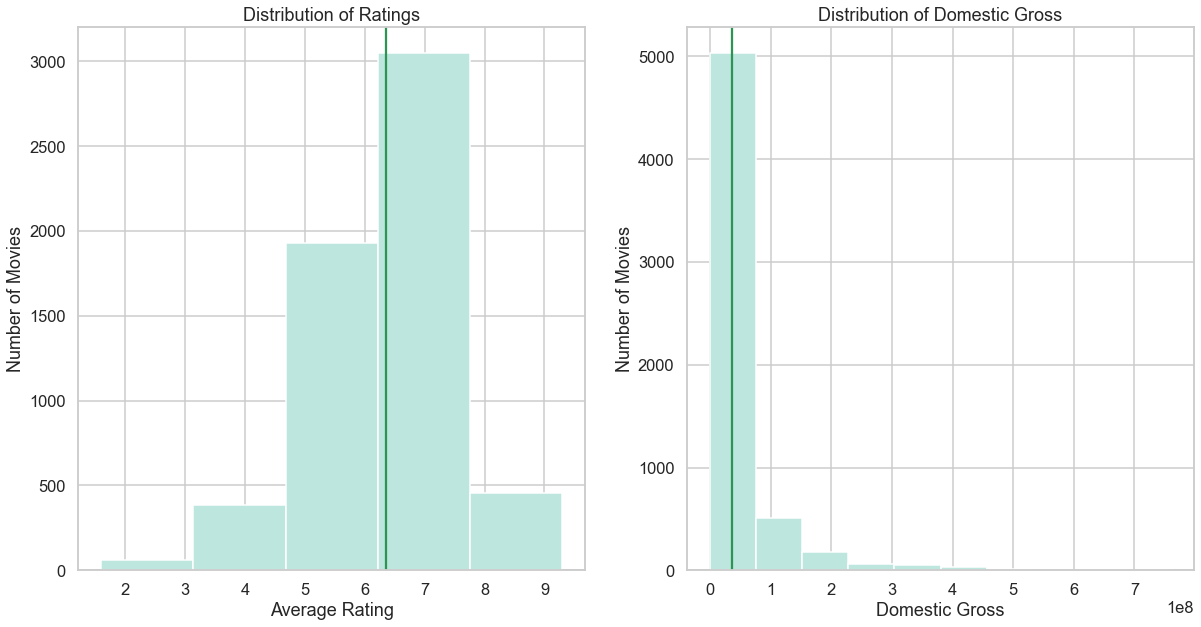

In [126]:
histogram_subplots(imdb_revenue_merge['averagerating'], imdb_revenue_merge['domestic_gross'], 'Average Rating', 
                         'Domestic Gross', 'Number of Movies', 'Number of Movies', 'Distribution of Ratings', 
                         'Distribution of Domestic Gross', 5, 10)

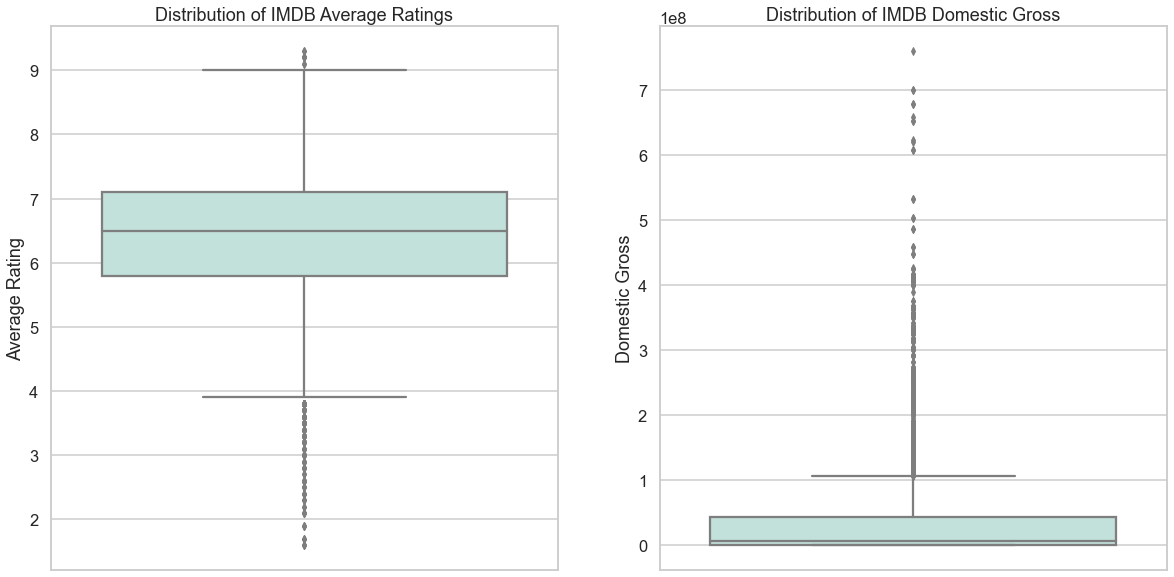

In [122]:
box_subplts(imdb_revenue_merge, 'averagerating', 'domestic_gross', 'Average Rating', 'Domestic Gross', 
                           'Distribution of IMDB Average Ratings', 'Distribution of IMDB Domestic Gross' )

In [123]:
imdb_revenue_merge.corr()['averagerating'].sort_values()

start_year        0.024169
domestic_gross    0.141853
numvotes          0.293551
averagerating     1.000000
Name: averagerating, dtype: float64

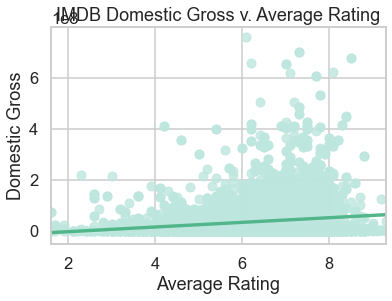

In [180]:
simple_regression('averagerating', 'domestic_gross', imdb_revenue_merge, 'IMDB Domestic Gross v. Average Rating', 
                          'Domestic Gross', 'Average Rating')

In [132]:
tmdb_bom_merge = pd.merge(tmdb_df, bom_df, how = 'inner', left_on ='original_title', right_on ='title')

# Dropping some columns that won't pertain to this analysis for readability
tmdb_bom_merge.drop(['year', 'title_x', 'title_y', 'studio', 'foreign_gross'], axis=1, inplace=True)

tmdb_bom_merge.head()

,original_title,vote_average,domestic_gross
0,How to Train Your Dragon,7.7,217600000.0
1,Iron Man 2,6.8,312400000.0
2,Inception,8.3,292600000.0
3,Toy Story 3,7.7,415000000.0
4,Despicable Me,7.2,251500000.0


In [133]:
print(len(tmdb_bom_merge)) # 2280

2280


In [135]:
tmdb_revenue_merge = pd.merge(tmdb_tn_merge, tmdb_bom_merge, how = 'outer', 
                              left_on = ['original_title', 'domestic_gross', 'vote_average'], 
                              right_on =['original_title', 'domestic_gross', 'vote_average'])

tmdb_revenue_merge.drop(['title', 'id', 'release_date', 'movie', 'production_budget', 
                        'worldwide_gross'], axis=1, inplace=True)

tmdb_revenue_merge.drop_duplicates(subset=None, keep='first', inplace=True)

tmdb_revenue_merge.head()

,original_title,vote_average,domestic_gross
0,How to Train Your Dragon,7.7,217581232.0
1,Iron Man 2,6.8,312433331.0
2,Toy Story,7.9,191796233.0
4,Inception,8.3,292576195.0
5,Percy Jackson & the Olympians: The Lightning T...,6.1,88768303.0


In [136]:
print(len(tmdb_revenue_merge)) # 4194

4194


In [139]:
cols = ['domestic_gross', 'vote_average']

for col in cols:
    print(col, '\n', tmdb_revenue_merge[col].isna().sum())

domestic_gross 
 12
vote_average 
 0


In [140]:
tmdb_revenue_merge.dropna(subset = ['domestic_gross'], axis = 0, inplace=True)

tmdb_revenue_merge['domestic_gross'].isna().sum()

0

In [141]:
tmdb_revenue_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4182 entries, 0 to 4595
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   original_title  4182 non-null   object 
 1   vote_average    4182 non-null   float64
 2   domestic_gross  4182 non-null   float64
dtypes: float64(2), object(1)
memory usage: 130.7+ KB


In [142]:
tmdb_revenue_merge.describe()

,vote_average,domestic_gross
count,4182.000000,4.182000e+03
mean,6.257700,4.553983e+07
std,1.071226,8.090809e+07
min,0.000000,0.000000e+00
25%,5.700000,5.323545e+05
50%,6.300000,1.501202e+07
75%,6.900000,5.457844e+07
max,10.000000,9.367000e+08


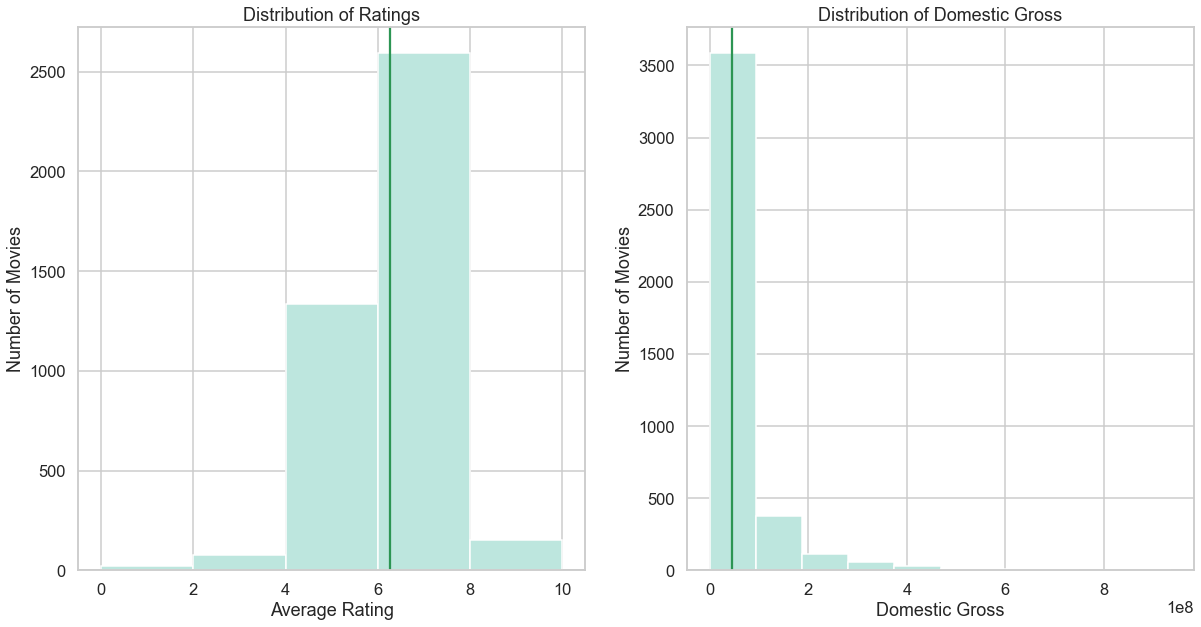

In [143]:
histogram_subplots(tmdb_revenue_merge['vote_average'], tmdb_revenue_merge['domestic_gross'], 'Average Rating', 
                         'Domestic Gross', 'Number of Movies', 'Number of Movies', 'Distribution of Ratings', 
                         'Distribution of Domestic Gross', 5, 10)

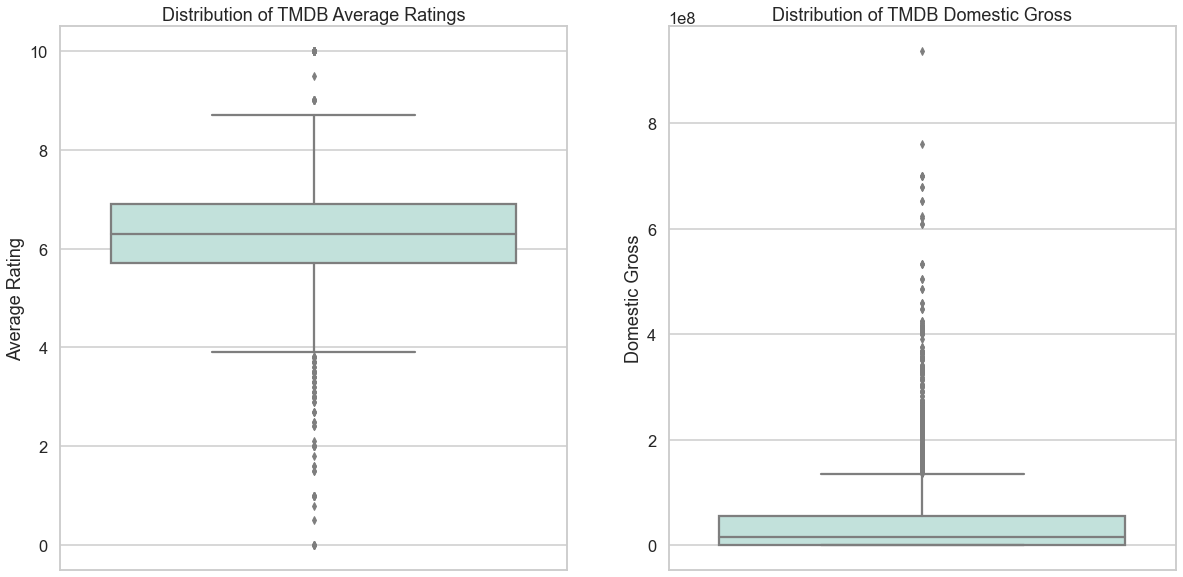

In [144]:
box_subplts(tmdb_revenue_merge, 'vote_average', 'domestic_gross', 'Average Rating', 'Domestic Gross', 
                           'Distribution of TMDB Average Ratings', 'Distribution of TMDB Domestic Gross' )

In [146]:
tmdb_revenue_merge.corr()['vote_average'].sort_values()

domestic_gross    0.178874
vote_average      1.000000
Name: vote_average, dtype: float64

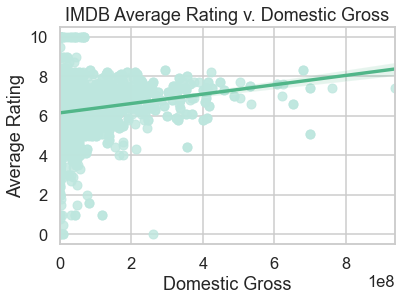

In [147]:
simple_regression('domestic_gross', 'vote_average', tmdb_revenue_merge, 'IMDB Average Rating v. Domestic Gross', 
                          'Average Rating', 'Domestic Gross')

## Discussion Concerning Question 1:



## Code and Visualizations pertinent to answering Question 2

Does the size of the movie budget impact the money made by the movie? 

## Discussion Concerning Question 2: 


## Code and Visualizations pertinent to answering Question 3

Does choice of director for the movie appear to impact the gross income of a movie? 

In [88]:
imdb_directors = pd.merge(imdb_df1, imdb_df4, how='inner', left_on = 'nconst', right_on = 'directors')

# dropping unnecessary columns.  
imdb_directors.drop(['writers', 'known_for_titles', 'primary_profession'], axis=1, inplace=True)

imdb_directors.head()


,nconst,primary_name,tconst,directors
0,nm0062879,Ruel S. Bayani,tt1592569,nm0062879
1,nm0062879,Ruel S. Bayani,tt8421806,nm0062879
2,nm0062879,Ruel S. Bayani,tt2057445,nm0062879
3,nm0062879,Ruel S. Bayani,tt2590280,nm0062879
4,nm0064023,Bryan Beasley,tt4512140,nm0064023


This dataframe will connect the name of the director to the movie ID.  

In [89]:
print(len(imdb_directors)) #124689

124689


In [90]:
director_movie_data = pd.merge(imdb_df3, imdb_directors, how = 'inner', left_on = 'tconst', right_on = 'tconst')

# Rename this column to better indicate what the column refers to in this combined dataframe.
director_movie_data = director_movie_data.rename(columns={'primary_name': 'director_name'})

director_movie_data.head()


,tconst,primary_title,original_title,start_year,runtime_minutes,genres,nconst,director_name,directors
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540,Harnam Singh Rawail,nm0712540
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",nm0002411,Mani Kaul,nm0002411
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,nm0000080,Orson Welles,nm0000080
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",nm0611531,Hrishikesh Mukherjee,nm0611531
4,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy,nm0398271,Frank Howson,nm0398271


This dataframe combines the IMDb data for all the movie titles with their director.  This can later be combined with profit information to determine who the directors are for the movies with the most profit.  Use for Question 3 and use with question 4 (need also imdb_df6 for that question).

In [91]:
print(len(director_movie_data)) # 124689

124689


Length of this data reduces total movies by number of movies with available director data.  

In [92]:
profit_bom = pd.merge(director_data, bom_df, how='inner', left_on = 'primary_title', right_on = 'title')
profit_bom.head()

NameError: name 'director_data' is not defined

## Discussion Concerning Question 3:


In [ ]:
budget = pd.merge(profit_bom, tn_df, how='inner',left_on='primary_title',right_on='movie')
budget.drop('domestic_gross_x', axis=1, inplace=True) # dropping the column with rounded domestic gross
budget = budget.rename(columns={'domestic_gross_y': 'domestic_gross'}) # rename unrounded column after dropping duplicate
budget.head()

In [ ]:
rt_data = pd.merge(rt_df1, rt_df3, how='inner',left_on='id',right_on='id')

# dropping these columns for readability and simplicity.  Won't use in analysis.
rt_data.drop(['currency', 'synopsis'], axis=1, inplace=True) 

rt_data.head()

## Code and Visualizations pertinent to answering Question 4

Do ratings have a relationship with who directs the movie? 

## Discussion Concerning Question 4:
